In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
#import autoreload
#?autoreload


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle as pickle

import random
random.seed(42)


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

In [3]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [4]:
import tensorflow as tf

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [5]:
print(tf.__version__)

1.3.0


# Pré-processamento

In [6]:
benign_data = pd.read_csv("clean_benign_API_dataset.csv", header = None)

In [7]:
malware_data = pd.read_csv("malware_API_dataset.csv", header = None, dtype= str)

In [8]:
dataset = pd.concat([benign_data, malware_data], ignore_index=True)

#### Dados Benignos

In [9]:
#adicionando uma coluna de variáveis-alvo para identificar que esses são arquivos benignos
#benign_data.assign(classe=0) #Esse código só insere a coluna de classes no final. É melhor inserir no começo.
benign_data.insert(loc=0, column='classe', value='0')
benign_data

,classe,0,1,2,3,4,5,6,7,8,...,442,443,444,445,446,447,448,449,450,451
0,0,actmovie.exe,b010fb33c42026ac3d8eb7220e8978de,GetStartupInfoA,GetModuleHandleA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,ahui.exe,1b408d64de8bb419f650f834edc5f615,GetTextMetricsW,DeleteDC,CreateFontIndirectW,SelectObject,GetObjectW,CreateCompatibleDC,DeleteObject,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,alg.exe,48f3a22e69b6ebe780d6d9b864edfe5f,RegCloseKey,SetServiceStatus,SystemFunction036,RegisterServiceCtrlHandlerW,RegEnumKeyExW,RegOpenKeyExW,StartServiceCtrlDispatcherW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,arp.exe,c139eec15a0fc5249f44480307b510cb,GetLastError,LoadLibraryA,GetModuleHandleA,LocalFree,FormatMessageA,GetProcAddress,GetSystemDirectoryA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,asr_fmt.exe,dd973208e8129406cd16d950d24370f8,AdjustTokenPrivileges,LookupPrivilegeValueW,OpenProcessToken,ClusterResourceControl,GetLastError,HeapFree,GetDriveTypeW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,asr_ldm.exe,cc909f048a1374e51f31e6af32736fe5,AdjustTokenPrivileges,LookupPrivilegeValueW,OpenProcessToken,DeviceIoControl,SetupDiEnumDeviceInterfaces,SetupDiGetDeviceInterfaceDetailW,SetupDiGetClassDevsW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,asr_pfu.exe,7a2ec33b6b402e2bceb6a60c97d527c5,AdjustTokenPrivileges,LookupPrivilegeValueW,RegOpenKeyExW,OpenProcessToken,RegSetValueExW,GetLastError,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,at.exe,763f854cf0bf498a835e45ffb4735e6f,RegCloseKey,RegQueryValueExW,RegOpenKeyExW,GetSystemTime,NetScheduleJobEnum,NetScheduleJobAdd,NetApiBufferFree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,atmadm.exe,51f220e37d40cb86be7982c3d9efa07a,DeviceIoControl,GetCurrentProcess,TerminateProcess,QueryPerformanceCounter,WideCharToMultiByte,GetCurrentProcessId,GetModuleHandleA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,attrib.exe,bb8bd36666c362d86835f81fc7a4294d,GetLastError,GetModuleHandleA,SetFileAttributesW,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Malwares

In [10]:
#adicionando uma coluna de variáveis-alvo para identificar que esses são arquivos malwares
#malware_data.assign(classe=1) #Esse código só insere a coluna de classes no final. É melhor inserir no começo.
malware_data.insert(loc=0, column='classe', value='1')
malware_data

,classe,0,1,2,3,4,5,6,7,8,...,587,588,589,590,591,592,593,594,595,596
0,1,Worm.Win32.Zwr.c,009a83236c600fd7ac034973f064284cec62f86631fe96...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Worm.Win32.Zwr.c,1219d0c4e336384b8474f8236634ccecaf6d1f5310591e...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Worm.Win32.Zwr.c,172b85e684b8426b4fe55c0245e4675ce1e3687b73a8c9...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Worm.Win32.Zwr.c,191828200aa2bd78f3548fb6a47407b05905efee6e83e0...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Worm.Win32.Zwr.c,1a1937fe8a401ca27be4514acc4f811442d8201abbad2a...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,Worm.Win32.Zwr.c,21bbf357ac6d8347c68ec65fb8283a5f1185f699186959...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,Worm.Win32.Zwr.c,39563933eebcb3b09b189000e1bda255b39739792fc136...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Worm.Win32.Zwr.c,39bb4065d226f81e242d655537f6bc043900ee1cb622f5...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,Worm.Win32.Zwr.c,45b9b1c191f69662da20dfbebedac8f8adb6c8c7865464...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,Worm.Win32.Zwr.c,4b9d839f0e9ad8674d3327eabc4a1245265b23d1b4ca54...,GetSystemDirectoryA,IsDBCSLeadByte,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Agora vou pegar uma pequena amostra aleatória desse dataset de malwares para fazer os treinos
malware_data_sample = malware_data.sample(n=700, replace=True)
malware_data_sample

,classe,0,1,2,3,4,5,6,7,8,...,587,588,589,590,591,592,593,594,595,596
21221,1,HEUR:Trojan.Win32.Generic,1d0b11163e07d9269b7fa7f224722641f80322ee80ba6f...,GetModuleFileNameW,LoadLibraryExW,LoadLibraryExA,LoadLibraryA,GetCommandLineA,GetEnvironmentStrings,GetVersion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13691,1,Trojan.Win32.FakeAV.raof,0b6fa22cf1a6d595d1b9c31bd60e711d6d732f19d23886...,CreateEventW,CreateEventA,LoadLibraryExW,LoadLibraryExA,LoadLibraryA,IsDBCSLeadByte,FindResourceExW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10926,1,Trojan.Win32.Llac.cxsz,075b50554d21c6070011deafe51b22fbb5516dfa5c4498...,GetSystemDirectoryA,GetVersionExW,IsDBCSLeadByte,CompareStringW,GetSystemTimeAsFileTime,GetCurrentProcessId,GetCurrentThreadId,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4795,1,Packed.Win32.Krap.iu,cf4af5a28c413d6a3e5315edfeaae7b565959e45ad02a6...,LoadLibraryExW,GetWindowsDirectoryA,lstrcatA,VirtualAllocEx,CreateFileW,CreateFileA,LocalAlloc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19183,1,not-a-virus:AdWare.Win32.MegaSearch.am,13ebd1453caf611e6f0029f8e135f5e6e02bd0ab8bd1bc...,GetSystemDirectoryA,GetVersionExW,IsDBCSLeadByte,CompareStringW,DisableThreadLibraryCalls,GetVersionExA,GetModuleHandleW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15119,1,not-a-virus:AdWare.Win32.MegaSearch.am,0de4d9ba8d42b9ef94a1d7b423781896bbe3f0032dd03c...,GetSystemDirectoryA,GetVersionExW,IsDBCSLeadByte,CompareStringW,DisableThreadLibraryCalls,GetVersionExA,GetModuleHandleW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13420,1,Trojan.Win32.Jorik.Shiz.hdu,0afa93e9d9c6acf3852ff171409e6525281c4024ffe287...,GetVersionExW,GetVersionExA,GetModuleHandleW,GetModuleHandleA,GetProcAddress,LocalAlloc,lstrlenW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8942,1,Trojan-FakeAV.Win32.LiveSecurity.i,e9b01a9d5044c3a5aef87415195efcb06f3f008e5168f6...,VirtualAllocEx,GetStartupInfoA,LockResource,GetCommandLineA,GetModuleFileNameA,FindResourceExW,LoadIconW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,1,HEUR:Trojan.Win32.Generic,cc7c3b8f2b263c41a3d6b9f78bfba76ea31977940fb7eb...,lstrcpyW,GetThreadLocale,lstrcmpiW,GlobalAlloc,GlobalLock,GlobalUnlock,GlobalReAlloc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7895,1,HEUR:Trojan.Win32.Generic,7b9ab9dbd9d8d8a69d69304d3bc53ab22454e3f7746b03...,LocalAlloc,CreateSemaphoreW,CreateSemaphoreA,GlobalAddAtomW,lstrcpynW,LoadLibraryExW,SearchPathW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dataset Completo

In [12]:
dataset = pd.concat([benign_data, malware_data_sample], ignore_index=True)
dataset

,classe,0,1,2,3,4,5,6,7,8,...,587,588,589,590,591,592,593,594,595,596
0,0,actmovie.exe,b010fb33c42026ac3d8eb7220e8978de,GetStartupInfoA,GetModuleHandleA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,ahui.exe,1b408d64de8bb419f650f834edc5f615,GetTextMetricsW,DeleteDC,CreateFontIndirectW,SelectObject,GetObjectW,CreateCompatibleDC,DeleteObject,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,alg.exe,48f3a22e69b6ebe780d6d9b864edfe5f,RegCloseKey,SetServiceStatus,SystemFunction036,RegisterServiceCtrlHandlerW,RegEnumKeyExW,RegOpenKeyExW,StartServiceCtrlDispatcherW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,arp.exe,c139eec15a0fc5249f44480307b510cb,GetLastError,LoadLibraryA,GetModuleHandleA,LocalFree,FormatMessageA,GetProcAddress,GetSystemDirectoryA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,asr_fmt.exe,dd973208e8129406cd16d950d24370f8,AdjustTokenPrivileges,LookupPrivilegeValueW,OpenProcessToken,ClusterResourceControl,GetLastError,HeapFree,GetDriveTypeW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,asr_ldm.exe,cc909f048a1374e51f31e6af32736fe5,AdjustTokenPrivileges,LookupPrivilegeValueW,OpenProcessToken,DeviceIoControl,SetupDiEnumDeviceInterfaces,SetupDiGetDeviceInterfaceDetailW,SetupDiGetClassDevsW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,asr_pfu.exe,7a2ec33b6b402e2bceb6a60c97d527c5,AdjustTokenPrivileges,LookupPrivilegeValueW,RegOpenKeyExW,OpenProcessToken,RegSetValueExW,GetLastError,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,at.exe,763f854cf0bf498a835e45ffb4735e6f,RegCloseKey,RegQueryValueExW,RegOpenKeyExW,GetSystemTime,NetScheduleJobEnum,NetScheduleJobAdd,NetApiBufferFree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,atmadm.exe,51f220e37d40cb86be7982c3d9efa07a,DeviceIoControl,GetCurrentProcess,TerminateProcess,QueryPerformanceCounter,WideCharToMultiByte,GetCurrentProcessId,GetModuleHandleA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,attrib.exe,bb8bd36666c362d86835f81fc7a4294d,GetLastError,GetModuleHandleA,SetFileAttributesW,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset para treino e validação 

In [13]:
dataset_X = dataset.values[:,4:597]
dataset_X

array([['GetModuleHandleA', nan, nan, ..., nan, nan, nan],
       ['DeleteDC', 'CreateFontIndirectW', 'SelectObject', ..., nan, nan,
        nan],
       ['SetServiceStatus', 'SystemFunction036',
        'RegisterServiceCtrlHandlerW', ..., nan, nan, nan],
       ..., 
       ['GetStartupInfoA', 'LockResource', 'GetModuleFileNameA', ..., nan,
        nan, nan],
       ['LoadLibraryExA', 'GetVersion', 'SetErrorMode', ..., nan, nan, nan],
       ['DisableThreadLibraryCalls', 'RegisterClipboardFormatA',
        'GetSystemDirectoryA', ..., nan, nan, nan]], dtype=object)

In [14]:
dataset_Y = dataset.values[:,0]
dataset_Y

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [15]:
#Usar o Label Encoder para dar valores para as API Calls de cada linha
le = preprocessing.LabelEncoder()

dataset_X_pandas = pd.DataFrame(dataset_X,dtype=str)
dataset_X_pandas.apply(le.fit_transform)

dataset_X = dataset_X_pandas.apply(le.fit_transform).values[:,:]
dataset_X 

array([[ 43, 172, 188, ...,   4,   3,   2],
       [ 18,  17, 154, ...,   4,   3,   2],
       [133, 157, 143, ...,   4,   3,   2],
       ..., 
       [ 50,  93,  51, ...,   4,   3,   2],
       [ 80,  70, 157, ...,   4,   3,   2],
       [ 20, 134,  64, ...,   4,   3,   2]], dtype=int64)

In [16]:
#Fazendo o split para treinamento
X_train, X_test, Y_train, Y_test = train_test_split(dataset_X, dataset_Y, test_size=0.5, random_state=42)

In [17]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(500, 593) (500,)
(500, 593) (500,)


In [18]:
from sklearn.preprocessing import MinMaxScaler

data = X_train
scaler = MinMaxScaler()
print(scaler.fit(data))

print(scaler.transform(data))

X_train = scaler.transform(data)
X_test = scaler.transform(X_test)


MinMaxScaler(copy=True, feature_range=(0, 1))
[[ 0.3877551   0.3255814   0.28191489 ...,  0.          0.66666667  0.5       ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 0.23129252  0.38372093  0.64893617 ...,  1.          1.          1.        ]
 ..., 
 [ 0.52380952  0.5         0.50531915 ...,  1.          1.          1.        ]
 [ 0.40136054  0.26162791  0.76595745 ...,  1.          1.          1.        ]
 [ 0.24489796  0.15697674  0.95212766 ...,  1.          1.          1.        ]]


D:\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Classificadores

###  <font color='green'>Decision Tree:</font>

In [25]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
acc_treino = clf.score(X_train, Y_train)
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 100.000000 %


In [27]:
acc_teste = clf.score(X_test, Y_test)
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 94.600000 %


In [28]:
Y_pred = clf.predict(X_test)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))


             precision    recall  f1-score   support

    Benigno       0.94      0.88      0.91       153
    Malware       0.95      0.97      0.96       347

avg / total       0.95      0.95      0.95       500



###  <font color='red'>Naive Bayes Gaussiano:</font>

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, Y_train.astype('int'))

GaussianNB(priors=None)

In [30]:
acc_treino = clf.score(X_train, Y_train.astype('int'))
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 79.400000 %


In [31]:
acc_teste = clf.score(X_test, Y_test.astype('int'))
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 72.400000 %


In [32]:
Y_pred = clf.predict(X_test)
Y_pred = Y_pred.astype(str)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.53      0.97      0.68       153
    Malware       0.98      0.62      0.76       347

avg / total       0.84      0.72      0.73       500



###  <font color='blue'>KNN:</font>

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
clf = KNeighborsClassifier(n_neighbors=1, metric ='euclidean')
clf.fit(X_train, Y_train) 

scores = cross_val_score(clf, X_train, Y_train, cv=10)
scores

array([ 0.96078431,  0.92156863,  0.98039216,  0.94      ,  1.        ,
        0.98      ,  1.        ,  0.95918367,  0.93877551,  0.95918367])

In [35]:
np.mean(scores)

0.96398879551820738

In [36]:
Y_pred = clf.predict(X_test)
Y_pred = Y_pred.astype(str)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.92      0.87      0.90       153
    Malware       0.94      0.97      0.96       347

avg / total       0.94      0.94      0.94       500



###  <font color='green'>SVM:</font>

In [37]:
from sklearn.svm import SVC


clf = SVC(class_weight='balanced')
clf.fit(X_train, Y_train) 

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
acc_treino = clf.score(X_train, Y_train)
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 93.000000 %


In [39]:
acc_teste = clf.score(X_test, Y_test)
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 89.800000 %


In [40]:
Y_pred = clf.predict(X_test)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.80      0.90      0.84       153
    Malware       0.95      0.90      0.92       347

avg / total       0.90      0.90      0.90       500



###  <font color='green'>Regressão Logística:</font>

In [41]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( solver='lbfgs',
                         multi_class='multinomial').fit(X_train, Y_train)

In [42]:
acc_treino = clf.score(X_train, Y_train)
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 100.000000 %


In [43]:
acc_teste = clf.score(X_test, Y_test)
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 95.000000 %


In [44]:
Y_pred = clf.predict(X_test)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.95      0.88      0.92       153
    Malware       0.95      0.98      0.96       347

avg / total       0.95      0.95      0.95       500



###  <font color='green'>Multilayer Perceptron(sklearn):</font>

In [45]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5)

clf.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [46]:
acc_treino = clf.score(X_train, Y_train)
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 100.000000 %


In [47]:
acc_teste = clf.score(X_test, Y_test)
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 94.200000 %


In [48]:
Y_pred = clf.predict(X_test)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.94      0.87      0.90       153
    Malware       0.94      0.97      0.96       347

avg / total       0.94      0.94      0.94       500



# Autoencoder (TensorFlow)

In [49]:
tf.reset_default_graph()

In [50]:
num_inputs = len(X_train[0])
num_layers = 2 #Posso controlar o número de camadas 
learning_rate = lr = 0.00001

In [51]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [52]:
initializer = tf.variance_scaling_initializer() #iniciando os pesos

In [53]:
act_func = tf.nn.relu

In [54]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs],name="Entrada")
y = tf.placeholder(tf.float32, shape=[None,num_inputs], name="y")

N_Input = num_inputs
Autoencoder = [X]
for i in range(1, num_layers+1):
    W = tf.Variable(initializer([int(N_Input/i),int(N_Input/(i+1))]),dtype=tf.float32)
    B = tf.Variable(tf.zeros(int(N_Input/(i+1))))
    Autoencoder.append(act_func(tf.matmul(Autoencoder[i-1],W) + B, name = "Encoder_Layer_%d" % i))
    #X = Hidden_layer
    #N_Input = int(N_Input/(2))



In [55]:
Autoencoder

[<tf.Tensor 'Entrada:0' shape=(?, 593) dtype=float32>,
 <tf.Tensor 'Encoder_Layer_1:0' shape=(?, 296) dtype=float32>,
 <tf.Tensor 'Encoder_Layer_2:0' shape=(?, 197) dtype=float32>]

In [56]:
#X = Encoder
N_input = num_inputs
#Decoder = [Hidden_layers_encoder[num_layers]]
for i,j,k in zip(reversed(range(2, num_layers+2)), range(num_layers+1,num_layers*2 + 1), range(1, num_layers+1)):
    W = tf.Variable(initializer([int(N_Input/i),int(N_Input/(i-1))]),dtype=tf.float32)
    B = tf.Variable(tf.zeros(int(N_Input/(i-1))))
    Autoencoder.append(act_func(tf.matmul(Autoencoder[j-1],W) + B , name = "Decoder_Layer_%d" % k) )
    #X = Hidden_layer
    #N_Input = int(N_Input*(2))
    #Hidden_layers_decoder.append(Hidden_layer)
#Decoder = Hidden_layer

In [57]:
Autoencoder

[<tf.Tensor 'Entrada:0' shape=(?, 593) dtype=float32>,
 <tf.Tensor 'Encoder_Layer_1:0' shape=(?, 296) dtype=float32>,
 <tf.Tensor 'Encoder_Layer_2:0' shape=(?, 197) dtype=float32>,
 <tf.Tensor 'Decoder_Layer_1:0' shape=(?, 296) dtype=float32>,
 <tf.Tensor 'Decoder_Layer_2:0' shape=(?, 593) dtype=float32>]

In [58]:
loss = tf.reduce_mean(tf.square(Autoencoder[num_layers*2] - y))

In [59]:
lr = 0.00001
momentum = 0.9
optimizer = tf.train.AdamOptimizer(lr)
#optimizer = tf.train.MomentumOptimizer(lr,momentum,use_nesterov=True)
train = optimizer.minimize(loss)

In [60]:
init = tf.global_variables_initializer()

In [61]:
def next_batch(x_data,batch_size):
    
    rindx = np.random.choice(x_data.shape[0], batch_size, replace=False)
    x_batch = x_data[rindx,:]
    return x_batch

In [62]:
saver = tf.train.Saver()

In [63]:
num_epochs = 100000
batch_size = 100
num_batches = len(X_train) // batch_size

In [64]:
X_train_malwares = np.copy(X_train)

for i in range(len(X_train)):
    if(Y_train[i] == '0'):
        X_train_malwares[i] = np.zeros(X_train[i].shape)

In [65]:
filename = "Autoencoder_TF_v6.ckpt"

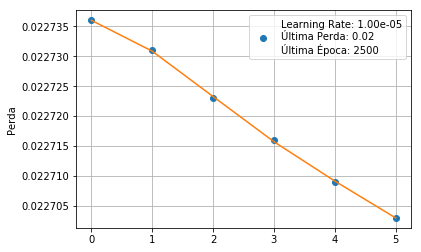

Terminou o treino do Autoencoder.


In [133]:
grafico_perda  = open("grafico_perda.txt", 'w')
grafico_perda.close()
#import os
#os.remove("grafico_perda.txt")
import os.path as file_check

from IPython.display import clear_output
with tf.Session() as sess:
    #sess.run(init)
    if(file_check.isfile(filename+".index")): saver.restore(sess, "./"+filename)
    else: sess.run(init)
    for epoch in range(num_epochs):        
        for iteration in range(num_batches):
            #X_batch = next_batch(X_train,batch_size)
            #Y_batch = next_batch(X_train_malwares,batch_size)
            sess.run(train,feed_dict={X: X_train, y: X_train_malwares})
        
        #if epoch % 1 == 0:
            training_loss = loss.eval(feed_dict={X: X_train, y: X_train_malwares})
            #print("Época: {} Perda: {}".format(epoch, training_loss))
            #print(step, "\tLoss:", err)
            #output_2d = hidden_layer.eval(feed_dict={X: X_train})
        if epoch % 500 == 0:
            clear_output(wait=True)
            
            with open('grafico_perda.txt', 'a') as grafico_perda:
                grafico_perda.write("%f \n" % training_loss) 
            
            with open('grafico_perda.txt', 'r') as grafico_perda:
                #grafico_perda  = open("grafico_perda.txt", 'r+')
                #grafico_perda.write("%.2f \n" % training_loss) 
                perdas = grafico_perda.read().splitlines()
                perdas = np.array(perdas,dtype=float)
                
                poly_deg = 4
                x_perdas = list(range(0,len(perdas)))
                if(len(x_perdas) > 1):
                    coefs = np.polyfit(x_perdas, perdas, poly_deg)
                    perdas_curva = np.polyval(coefs, x_perdas)

                    fig = plt.plot(x_perdas, perdas, 'o', x_perdas, perdas_curva)
                else: fig = plt.plot(x_perdas, perdas, 'o')
                plt.legend(['Learning Rate: %.2e\nÚltima Perda: %.2f\nÚltima Época: %d' % (lr,training_loss,epoch)])
                plt.ylabel('Perda')
                plt.grid()
                plt.show()
                plt.gcf().clear()
                del fig
                #print("Último valor de Perda: %.2f\n" % training_loss)
                
            if epoch != 0: saver.save(sess, "./"+filename)    
            if epoch == 2500: break
    #output_2d_test = hidden_layer.eval(feed_dict={X: scaled_test_data})
print("Terminou o treino do Autoencoder.")
grafico_perda.close()

In [87]:
#OBTER RESULTADOS
with tf.Session() as sess:
    
    saver.restore(sess,"./"+filename )
    
    results = Autoencoder[num_layers*2].eval(feed_dict={X:X_train})

INFO:tensorflow:Restoring parameters from ./Autoencoder_TF_v6.ckpt


In [88]:
#num_test_images = 10
#
#with tf.Session() as sess:
#    
#    saver.restore(sess,'./example_stacked_autoencoder.ckpt' )
#    
#    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

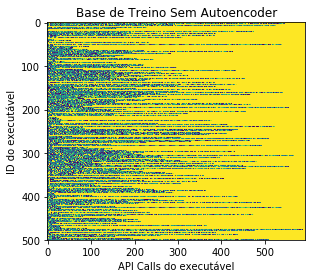

In [89]:
plt.imshow(X_train)
plt.title("Base de Treino Sem Autoencoder")
plt.ylabel("ID do executável")
plt.xlabel("API Calls do executável")
plt.show()

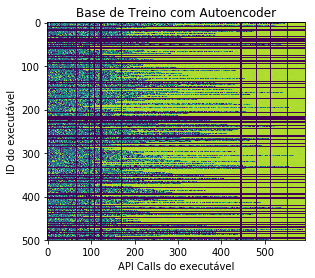

In [90]:
plt.imshow(results)
plt.title("Base de Treino com Autoencoder")
plt.ylabel("ID do executável")
plt.xlabel("API Calls do executável")
plt.show()

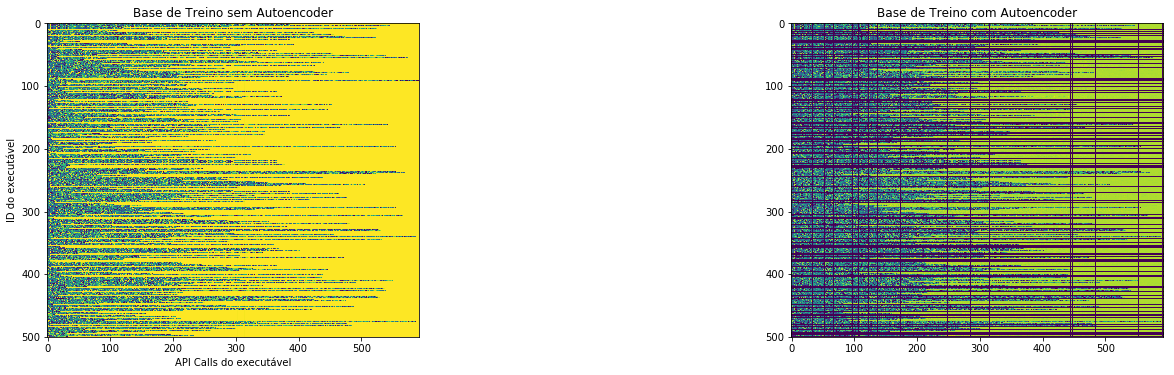

In [91]:
num_test_images = 2
f, a = plt.subplots(1, 2, figsize=(20,20))
for i in range(num_test_images):
    if(i == 0): 
        a[i].imshow(X_train)
        a[i].set_title("Base de Treino sem Autoencoder")
        a[i].set_ylabel("ID do executável")
        a[i].set_xlabel("API Calls do executável")
    else: 
        a[i].imshow(results)
        a[i].set_title("Base de Treino com Autoencoder")
f.subplots_adjust(wspace=1)
plt.show()

In [92]:
from sklearn.metrics import explained_variance_score
y_true = X_train_malwares
y_pred = results
print(explained_variance_score(y_true, y_pred) * 100)
#Métrica percentual que eu uso para julgar o quão próximo é o y esperado do y verdadeiro
#y_true e y_pred devem ter uma variância parecida
#melhor valor possível é 100%

94.112144024


### Novo Dataset para Treino [Resultado do Encoder no Autoencoder]

In [93]:
Autoencoder

[<tf.Tensor 'Entrada:0' shape=(?, 593) dtype=float32>,
 <tf.Tensor 'Encoder_Layer_1:0' shape=(?, 296) dtype=float32>,
 <tf.Tensor 'Encoder_Layer_2:0' shape=(?, 197) dtype=float32>,
 <tf.Tensor 'Decoder_Layer_1:0' shape=(?, 296) dtype=float32>,
 <tf.Tensor 'Decoder_Layer_2:0' shape=(?, 593) dtype=float32>]

In [94]:
#OBTER RESULTADOS DO ENCODER
with tf.Session() as sess:
    
    saver.restore(sess,"./"+filename )
    
    results_train = Autoencoder[num_layers].eval(feed_dict={X:X_train})
    results_test = Autoencoder[num_layers].eval(feed_dict={X:X_test})

INFO:tensorflow:Restoring parameters from ./Autoencoder_TF_v6.ckpt


In [124]:
#X_train_encoder = np.concatenate((X_train, results_train), axis=1)

In [125]:
#X_train_encoder.shape

In [126]:
#X_test_encoder = np.concatenate((X_test, results_test), axis=1)

In [127]:
#X_test_encoder.shape

In [99]:
X_train_new = results_train
X_test_new = results_test

In [128]:
print(X_train_new.shape)

(500, 197)


In [129]:
print(X_test_new.shape)

(500, 197)


# Classificadores (Com Auxílio do Autoencoder)

###  <font color='green'>Decision Tree:</font>

In [100]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train_new, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
acc_treino = clf.score(X_train_new, Y_train)
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 100.000000 %


In [102]:
acc_teste = clf.score(X_test_new, Y_test)
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 95.200000 %


In [103]:
Y_pred = clf.predict(X_test_new)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))


             precision    recall  f1-score   support

    Benigno       1.00      0.84      0.91       153
    Malware       0.94      1.00      0.97       347

avg / total       0.96      0.95      0.95       500



###  <font color='red'>Naive Bayes Gaussiano:</font>

In [104]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train_new, Y_train.astype('int'))

GaussianNB(priors=None)

In [105]:
acc_treino = clf.score(X_train_new, Y_train.astype('int'))
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 98.800000 %


In [106]:
acc_teste = clf.score(X_test_new, Y_test.astype('int'))
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 94.600000 %


In [107]:
Y_pred = clf.predict(X_test_new)
Y_pred = Y_pred.astype(str)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.98      0.84      0.91       153
    Malware       0.93      0.99      0.96       347

avg / total       0.95      0.95      0.94       500



###  <font color='blue'>KNN:</font>

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
clf = KNeighborsClassifier(n_neighbors=1, metric ='euclidean')
clf.fit(X_train_new, Y_train) 

scores = cross_val_score(clf, X_train_new, Y_train, cv=10)
scores

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.97959184,  1.        ])

In [110]:
np.mean(scores)

0.99795918367346936

In [111]:
Y_pred = clf.predict(X_test_new)
Y_pred = Y_pred.astype(str)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.98      0.85      0.91       153
    Malware       0.94      0.99      0.97       347

avg / total       0.95      0.95      0.95       500



###  <font color='green'>SVM:</font>

In [112]:
from sklearn.svm import SVC


clf = SVC(class_weight='balanced')
clf.fit(X_train_new, Y_train) 

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
acc_treino = clf.score(X_train_new, Y_train)
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 100.000000 %


In [114]:
acc_teste = clf.score(X_test_new, Y_test)
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 95.000000 %


In [115]:
Y_pred = clf.predict(X_test_new)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.98      0.86      0.91       153
    Malware       0.94      0.99      0.96       347

avg / total       0.95      0.95      0.95       500



###  <font color='green'>Regressão Logística:</font>

In [116]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( solver='lbfgs',
                         multi_class='multinomial').fit(X_train_new, Y_train)

In [117]:
acc_treino = clf.score(X_train_new, Y_train)
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 100.000000 %


In [118]:
acc_teste = clf.score(X_test_new, Y_test)
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 95.000000 %


In [119]:
Y_pred = clf.predict(X_test_new)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.98      0.85      0.91       153
    Malware       0.94      0.99      0.97       347

avg / total       0.95      0.95      0.95       500



###  <font color='green'>Multilayer Perceptron(sklearn):</font>

In [120]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5)

clf.fit(X_train_new, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [121]:
acc_treino = clf.score(X_train_new, Y_train)
print("Acurácia de treino: %f %%" % (acc_treino*100))

Acurácia de treino: 100.000000 %


In [122]:
acc_teste = clf.score(X_test_new, Y_test)
print("Acurácia de teste: %f %%" % (acc_teste*100))

Acurácia de teste: 94.600000 %


In [123]:
Y_pred = clf.predict(X_test_new)
target_names = ['Benigno', 'Malware']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Benigno       0.96      0.86      0.91       153
    Malware       0.94      0.98      0.96       347

avg / total       0.95      0.95      0.95       500

